<img src="../assets/a_type_readme.gif" style="float:right ; margin: 10px ; width:300px;"> 
<h1><left>NLP Project</left></h1>
<h4><left>Using Natural Language Processing to better understand Depression & Anxiety</left></h4>
___

## 3. Analysis

In [1]:
import numpy as np
from numpy import core, array
assert np.__version__ == "1.19.5"

import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")

import sentencepiece as spm

import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models import Word2Vec, KeyedVectors
# from gensim.models import Word2Vec
assert gensim.__version__ == "4.0.1"

from sklearn.model_selection import KFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from pickle import dump
from nltk import word_tokenize

import matplotlib.pyplot as plt
%matplotlib inline

from time import time 

import logging 

import multiprocessing
 
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

c:\users\yegmo\appdata\local\programs\python\python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# pip install --upgrade --user numpy
np.__version__

'1.19.5'

In [3]:
logging.basicConfig(filename="../analysis.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
logger = logging.getLogger()

def print_time(intput_str, start_time=0):
    print("{}: {} min".format(input_str, round((time() - start_time) / 60, 2)))
    
# #Setting the threshold of logger to DEBUG
# logger.setLevel(logging.DEBUG)
  
# #Test messages
# logger.debug("Harmless debug Message")
# logger.info("Just an information")
# logger.warning("Its a Warning")
# logger.error("Did you try to divide by zero")
# logger.critical("Internet is down")

In [4]:
model_data = pd.read_csv('../data/data_for_model.csv', keep_default_na=False)
print(model_data.info())
model_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      1930 non-null   object
 1   selftext                   1930 non-null   object
 2   author                     1930 non-null   object
 3   score                      1930 non-null   int64 
 4   num_comments               1930 non-null   int64 
 5   is_anxiety                 1930 non-null   int64 
 6   url                        1930 non-null   object
 7   selftext_clean             1930 non-null   object
 8   selftext_broken_sentences  1930 non-null   object
 9   selftext_broken_words      1930 non-null   object
 10  title_clean                1930 non-null   object
 11  author_clean               1930 non-null   object
 12  megatext_clean             1930 non-null   object
dtypes: int64(3), object(10)
memory usage: 196.1+ KB
None


,title,selftext,author,score,num_comments,is_anxiety,url,selftext_clean,selftext_broken_sentences,selftext_broken_words,title_clean,author_clean,megatext_clean
0,Our most-broken and least-understood rules is ...,We understand that most people who reply immed...,SQLwitch,2319,175,0,https://www.reddit.com/r/depression/comments/d...,understand people reply immediately op invitat...,['we understand that most people who reply imm...,"['understand', 'people', 'reply', 'immediately...",broken least understood rule helper may invite...,sql witch,sql witch understand people reply immediately ...
1,"Regular Check-In Post, with important reminder...",Welcome to /r/depression's check-in post - a p...,SQLwitch,312,1136,0,https://www.reddit.com/r/depression/comments/m...,welcome r depression check post place take mom...,"[""welcome to /r/depression's check-in post - a...","['welcome', 'r', 'depression', 'check', 'post'...",regular check post important reminder private ...,sql witch,sql witch welcome r depression check post plac...
2,Low,I'm so low rn I can't even type anything coher...,RagingFlock89,263,43,0,https://www.reddit.com/r/depression/comments/n...,low rn even type anything coherent want expres...,"[""i'm so low rn i can't even type anything coh...","['low', 'rn', 'even', 'type', 'anything', 'coh...",low,raging flock 89,raging flock 89 low rn even type anything cohe...


In [5]:
data_column = "selftext_clean"
# model_data[data_column][0]
# model_data["megatext_clean"]
# sents = [eval(sent) for sent in model_data["selftext_broken_words"]]
# dp = model_data["selftext_broken_words"].tolist()[1]
# literal_eval(dp)
# model_data["megatext_clean"].to_csv(data_path, header=None, index=None, sep='\t', mode='a')

## Word2Vec

### Model

In [6]:
def my_word2vec(label, data, vector_size=300):
#     sents = [eval(sent) for sent in data]
    sents = [word_tokenize(sent) for sent in data]
    
#     model = Word2Vec(sentences=data, size=10, min_count=5, seed=42, workers=2, iter=5) #default values
#     model = Word2Vec(sentences=data, size=10, min_count=5, seed=42, workers=2, iter=5)
    model = Word2Vec(sentences=sents, vector_size=vector_size, window=5, min_count=5, epochs=20)

    model.save('../models/{}.word2vec.model'.format(label))
    
#     model.build_vocab()
#     model.load('{}.word2vec.model'.format(label))

    return model

In [7]:
depression_data = model_data[model_data["is_anxiety"] == 0][data_column].to_list()
dep_w2v_model = my_word2vec("depression", depression_data)

anxiety_data = model_data[model_data["is_anxiety"] == 1][data_column].to_list()
anx_w2v_model = my_word2vec("anxiety", anxiety_data)

all_data =  model_data[data_column].to_list()
all_w2v_model = my_word2vec("all", all_data)
# print("\nvocab_size =", len(all_w2v_model.wv))

### Plot and Analysis

In [8]:
def most_similar_simple(model, word, topCount=1):
    return model.wv.most_similar(word, topn=topCount)


def most_synonym(model, word, topCount=1):
    return model.wv.most_similar(positive = [word], topn=topCount)


def most_antonym(model, word, topCount=1):
    return model.wv.most_similar(negative = [word], topn=topCount)


def vector_similarity(model, word1, word2):
    return model.wv.similarity(w1=word1 ,w2=word2)


def odd_one(model, sentence):
    return model.wv.doesnt_match(sentence.split())


def word_relation(model, positive, negative, topCount=1):
    return model.wv.most_similar(positive=positive, negative=negative, topn=topCount)


def cosine_distance(model, word, target_list, count):
    cosine_dict ={}
    word_list = []
    a = model[word]

    for item in target_list:
        if item != word:
            b = model [item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            # cos_sim = distance.cosine(a, b)
            cosine_dict[item] = cos_sim

    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))

    return word_list[: count]

In [9]:
def plot_closest_words(model, word):
    arr = np.empty((0,64), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.__getitem__([wrd_score])
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    # plt.figure(figsize=(16, 16))

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)

    plt.show()

In [10]:
def tsne_scatter_plot(model, source, word):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    list_names = [t[0] for t in model.wv.most_similar(positive=[word], topn=30)][10:]
    
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization {} model for {}'.format(source, word.title()))
    
    plt.savefig(f'../reports/images/word2vec_{source}_{word}.png')

### Examples

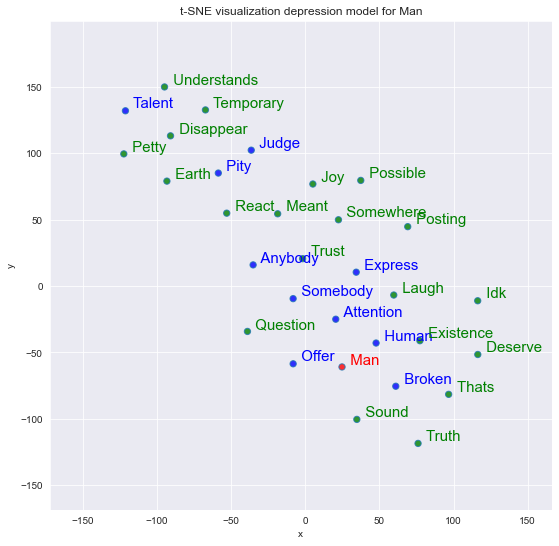

In [11]:
# plot_closest_words(dep_w2v_model, anx_w2v_model, "man")
tsne_scatter_plot(dep_w2v_model, "depression", "man")

## Tokenization

In [12]:
def tokenization(vocab_size, data_column):
        # kfold = KFold(n_splits=5, shuffle=True)
    data_np = model_data[data_column].to_numpy()

    # # for train_idx, test_idx in kfold.split(train_x):
    mean_unks_count = 0
    for i in range(5):
        train, test = train_test_split(data_np, test_size=0.2, random_state=42)
        train_path = "../data/tokenization/train_vs{}_i{}.txt".format(vocab_size, i)
        np.savetxt(train_path, train, fmt='%s')
        
        # test_path = "../data/tokenization_test_{}.txt".format(i)

        model_prefix = '../models/tokenization/vs{}_i{}'.format(vocab_size, i)
        
        spm.SentencePieceTrainer.train(input=train_path, model_prefix=model_prefix, vocab_size=vocab_size)   
        sp = spm.SentencePieceProcessor()                                                               # create an instance; this saves model and .vocab files 
        sp.load('{}.model'.format(model_prefix))                                                        # loads model

    #     data_subwords  = [sp.id_to_piece(piece_id) for piece_id in range(sp.get_piece_size())]          # list of subwords
        unks_count = 0
        for post in test:
            sp_encoded = sp.encode_as_ids(post)
            # print(sp.encode_as_pieces(post))
            unks_count += sp_encoded.count(0)

        print("\t{}: {}".format(i, unks_count))
        mean_unks_count += unks_count
    mean_unks_count /= 5
    print("mean =", mean_unks_count)

In [13]:
for vocab_size in [50, 200, 500, 1000, 2000, 4000]:
    print("\nvocab_size =", vocab_size)
    tokenization(vocab_size=vocab_size, data_column=data_column)


vocab_size = 50
	0: 65
	1: 65
	2: 65
	3: 65
	4: 65
mean = 65.0

vocab_size = 200
	0: 65
	1: 65
	2: 65
	3: 65
	4: 65
mean = 65.0

vocab_size = 500
	0: 65
	1: 65
	2: 65
	3: 65
	4: 65
mean = 65.0

vocab_size = 1000
	0: 65
	1: 65
	2: 65
	3: 65
	4: 65
mean = 65.0

vocab_size = 2000
	0: 65
	1: 65
	2: 65
	3: 65
	4: 65
mean = 65.0

vocab_size = 4000
	0: 65
	1: 65
	2: 65
	3: 65
	4: 65
mean = 65.0


## Parsing

## Language Model

### Data

### Model

In [14]:
model_data[data_column]

0       understand people reply immediately op invitat...
1       welcome r depression check post place take mom...
2       low rn even type anything coherent want expres...
3       wake 8 hour decent sleep still exhausted day e...
4       guess always depressed never really thought mu...
                              ...                        
1925    applied static midterm tomorrow already failed...
1926    recently decided stop smoking weed socially th...
1927    recently got little habit thing get overwhelmi...
1928                             need someone vent please
1929    everytime go grandma old house still alive ass...
Name: selftext_clean, Length: 1930, dtype: object

In [15]:
def organize_token_seqs(data, length=20+1):
    sequences = list()
    
    for record in data:
        tokens = word_tokenize(record)
        
        for i in range(length, len(tokens)):
            seq = tokens[i-length: i]
            assert len(seq) == length, (length, len(seq), seq)
            line = ' '.join(seq)
            sequences.append(line)
        
#     if len(sequences)== 0:
#         print(tokens)
#     print('Total Sequences: %d' % len(sequences))
    
    return sequences

In [16]:
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()
    
    
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

In [17]:
def build_LM_A(vocab_size, seq_length, summary=False):
    model = Sequential()
    model.add(Embedding(vocab_size, 50, input_length=seq_length))
    model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))
    if summary:
        print(model.summary())
    
    return model

In [20]:
def language_model(label, data, n_seq_words, EPOCHS=100, BATCH=128):
    model_path = '../models/{}.language_model.h5'.format(label)
    tokenizer_path = '../models/{}.language_model.tokenizer.pkl'.format(label)
    processed_data_path = '../data/{}.language_model.processed_data.txt'.format(label)
    
    # ------------------------------ PREPARE DATA -----------------------------------
    processed_data = organize_token_seqs(data, n_seq_words)
    save_doc(processed_data, processed_data_path)
    
#     doc = load_doc(processed_data_path)
#     processed_data = doc.split('\n')
#     print("\nword sequences\n", processed_data[:5])
    
    
    # integer encode sequences of words
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(processed_data)
    unchecked_sequences = tokenizer.texts_to_sequences(processed_data)
    print('\nTotal before Sequences: %d' % len(unchecked_sequences))
    print("int sequences lengths", set([len(seq) for seq in unchecked_sequences]))    
    #     print("\nint sequences\n", sequences[:5])
    
    
    sequences = []
    for seq in unchecked_sequences:
        if len(seq) == n_seq_words:
            sequences.append(seq)
    print('\nTotal after Sequences: %d' % len(sequences))
    print("int sequences lengths", set([len(seq) for seq in sequences]))    
    

    vocab_size = len(tokenizer.word_index) + 1
    print("\nvocab_size", vocab_size)
    
    # separate into input and output
    sequences = array(sequences)
#     print("\nsequences", sequences)
    print("\nsequences.shape", sequences.shape)
    
    X, y = sequences[:,:-1], sequences[:,-1]
    print("X\n", X)
    print("y\n", y)
    
    y = to_categorical(y, num_classes=vocab_size)
    seq_length = X.shape[1]+1
#     seq_length =len(X[0])
    print("seq_length", seq_length)
    
    # ------------------------------ TRAIN MODEL -----------------------------------
    model = build_LM_A(vocab_size, seq_length, summary=True)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X, y, batch_size=BATCH, epochs=EPOCHS, verbose=1) 
    
    model.save(model_path)
    dump(tokenizer, open(tokenizer_path, 'wb'))
    
    return model

In [ ]:
EPOCHS = 100
BATCH = 128
n_seq_words = 20

# all_words =  model_data[data_column]
depression_words = model_data[model_data["is_anxiety"] == 0][data_column]
dep_model = language_model("depression", depression_words, n_seq_words, EPOCHS, BATCH)

anxiety_words = model_data[model_data["is_anxiety"] == 1][data_column]
anx_model = language_model("anxiety", anxiety_words, n_seq_words, EPOCHS, BATCH)


Total before Sequences: 63874
int sequences lengths {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}

Total after Sequences: 62992
int sequences lengths {20}

vocab_size 7424

sequences.shape (62992, 20)
X
 [[ 184   14 1167 ... 2143  292   26]
 [  14 1167 1443 ...  292   26  386]
 [1167 1443 1868 ...   26  386 1508]
 ...
 [ 202   30 1632 ...    5   28  226]
 [  30 1632   72 ...   28  226    5]
 [1632   72    3 ...  226    5   97]]
y
 [ 386 1508   55 ...    5   97    2]
seq_length 20
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 50)            371200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 100)           60400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)   

493/493 [==============================] - 66s 134ms/step - loss: 5.2101 - accuracy: 0.0871
Epoch 26/100
493/493 [==============================] - 74s 150ms/step - loss: 5.1169 - accuracy: 0.0964 1:00 - loss: 4.9826 - accuracy - ETA: 1:00 - loss: 4.9864 - accuracy:  - ETA: 1:00 - - ETA: 55s - loss: 5.001 - ETA: 52s - - ETA: 47s - loss: 5.0296 - accuracy: 0.1 - ETA: 46s - loss: 5.031 - ETA: 29s - loss: 5.0700 - a -  - - ETA: 5s - loss: 5.1089 - accuracy: 0.09 - E - ETA: 1s - los
Epoch 27/100
493/493 [==============================] - 67s 136ms/step - loss: 5.0299 - accuracy: 0.1060s - loss: 5.0225 - accuracy: 0.10 - ETA: 6s - loss: 5.0225 - accura -
Epoch 28/100
493/493 [==============================] - 63s 129ms/step - loss: 4.9412 - accuracy: 0.1153s - loss: 4.9388 - accuracy - ETA: 0s - loss: 4.9395 - ac
Epoch 29/100
493/493 [==============================] - 62s 126ms/step - loss: 4.8643 - accuracy: 0.1237
Epoch 30/100
493/493 [==============================] - 62s 126ms/step - lo

493/493 [==============================] - 70s 143ms/step - loss: 3.3927 - accuracy: 0.3122 1:06 - loss: 
Epoch 60/100
493/493 [==============================] - 64s 130ms/step - loss: 3.3634 - accuracy: 0.3177 37s - loss: 3.2837 - accu - ETA: 36s - loss: 3.2919 - accuracy: 0.328 - ETA: 36s - ETA: 32s - loss: 3.2985 - accura - ETA: 31s - loss: 3.3045 - accurac - ETA: 30s - loss: 3.3063 - accuracy: 0.327 - ETA: 30s - loss: 3.3069 - accuracy: 0.327 - ETA: 30s - loss: 3.3068 - accuracy: 0 - ETA: 29s - lo - ETA: 26s - loss: 3.3143 - accuracy: 0.3
Epoch 61/100
493/493 [==============================] - 61s 125ms/step - loss: 3.3213 - accuracy: 0.3233
Epoch 62/100
493/493 [==============================] - 62s 126ms/step - loss: 3.2951 - accuracy: 0.3275s - loss: 3.2917 - accuracy: 0. - ETA: 2s - l - ETA: 0s - loss: 3.2951 - accuracy: 0.
Epoch 63/100
493/493 [==============================] - 63s 128ms/step - loss: 3.2629 - accuracy: 0.3324
Epoch 64/100
493/493 [=============================

493/493 [==============================] - 86s 175ms/step - loss: 2.5236 - accuracy: 0.4539 - ETA: 1: - ETA: 1:21 - loss: 2.3969 - accuracy: 0.48 - ETA: 1:21 - loss: - ETA: 1:02 - loss: 2.4 - ETA: 1:01 - loss: 2.4370 - accuracy: 0.47 - ETA: 1:00 - loss: 2.4377 - accu - ETA: 1:00 - loss - ETA: 55s - loss: 2.4399 - accuracy: 0.4 - ETA: 55s - loss: 2.4411 - ac - ETA: 52s - los - ETA: 46s - loss: 2.4502 -  - ETA: 43s - loss: 2.4569 - accurac - ETA: 41s   - ETA: 19s - loss: 2.5009 - accuracy: 0.457 - ETA: 19s - loss: 2.5005 - accuracy: 0.45 - ETA: 11s - loss: 2.5080 - accuracy: 0.456 - ETA: 10s - loss: 2.5084 - accur - ETA: 5s - loss: 2.5
Epoch 89/100
493/493 [==============================] - 95s 193ms/step - loss: 2.5176 - accuracy: 0.4528 55s - loss: 2.4518 - accuracy:  -
Epoch 90/100
493/493 [==============================] - 106s 215ms/step - loss: 2.4892 - accuracy: 0.4593
Epoch 91/100
493/493 [==============================] - 114s 231ms/step - loss: 2.4497 - accuracy: 0.46591:37 - l

497/497 [==============================] - 95s 191ms/step - loss: 6.4963 - accuracy: 0.0362 50s - loss: 6.4604 - accuracy: 0.03 - ETA: 49s - l - ETA: 43s - loss: 6.4702 - accu - ETA: 23s - loss: 6.4887 - accuracy: 0 - ETA: 22s - 
Epoch 14/100
497/497 [==============================] - 104s 209ms/step - loss: 6.4341 - accuracy: 0.0385
Epoch 15/100
497/497 [==============================] - 121s 244ms/step - loss: 6.3715 - accuracy: 0.0401
Epoch 16/100
497/497 [==============================] - 132s 265ms/step - loss: 6.3091 - accuracy: 0.0408
Epoch 17/100
497/497 [==============================] - 126s 254ms/step - loss: 6.2455 - accuracy: 0.0419
Epoch 18/100
497/497 [==============================] - 139s 280ms/step - loss: 6.1804 - accuracy: 0.0433
Epoch 19/100
497/497 [==============================] - 113s 227ms/step - loss: 6.1100 - accuracy: 0.044916s - loss: 6.1045 - accuracy: 0. - ETA: 15s - ETA: 8s - l - ETA: 5s - loss: 6.1097 - accuracy - ETA: 4s - loss: - ETA: 1s - loss: 6.10

In [ ]:
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = []
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

In [ ]:
# exp_count = 2

# # load the model
# model = load_model(model_path)
 
# # load the tokenizer
# tokenizer = load(open(tokenizer_path, 'rb'))

# for _ in range(exp_count):
#     seed_text = lines[randint(0,len(lines))]
#     print("seed_text\n", seed_text + '\n')

#     generated = generate_seq(model, tokenizer, seq_length, seed_text, n_seq_words)
#     print(generated)